<a href="https://colab.research.google.com/github/JayNguyen-123/EmailClassification/blob/main/EmailClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/ham-spam.csv')
df.head()


,IsSpam,Text
0,0,key issues going forwarda year end reviews rep...
1,0,congrats contratulations the execution the cen...
2,0,key issues going forwardall under control set...
3,0,epmi files protest entergy transcoattached our...
4,0,california power please contact kristin walsh ...


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IsSpam  1000 non-null   int64 
 1   Text    1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df = df.drop_duplicates()
df.groupby('IsSpam').describe()


Text                                                               
       count unique                                                top freq
IsSpam                                                                     
0        499    499  key issues going forwarda year end reviews rep...    1
1        500    500  take the reinsbecomeyour employer substantial ...    1

In [ ]:
# create column x containing text in the "Text" column with stopwords removed and label column y
import nltk
nltk.download('book')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
  text = word_tokenize(text.lower())
  stop_words = set(stopwords.words('english'))
  # check whether all characters in the String are an alphabet with isalpha()
  text = [word for word in text if word.isalpha() and not word in stop_words]
  return ' '.join(text)

X = df.apply(lambda row: remove_stopwords(row['Text']), axis=1)
y = df['IsSpam']




[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
# Tokenizer the text and create padded sequences from it

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 20000
max_length = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
X = pad_sequences(sequences, maxlen=max_length)


In [ ]:
# Build the model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()






/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=20)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5974 - loss: 0.6678 - val_accuracy: 0.2000 - val_loss: 0.8436
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8882 - loss: 0.2541 - val_accuracy: 0.9850 - val_loss: 0.0916
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.9917 - loss: 0.0474 - val_accuracy: 0.9200 - val_loss: 0.2245
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9962 - loss: 0.0167 - val_accuracy: 0.9100 - val_loss: 0.1666
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.9300 - val_loss: 0.1687


[]

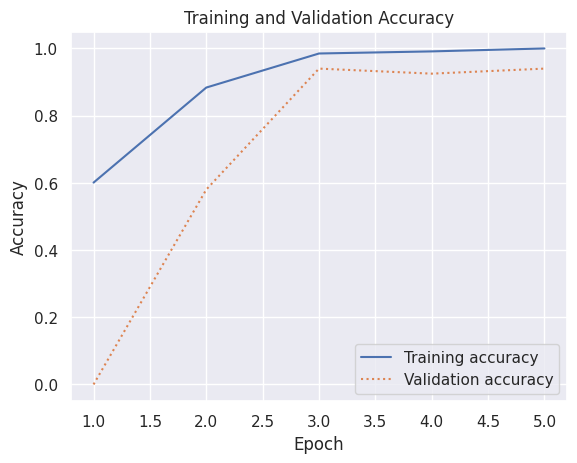

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline if plot in Jupyter notebook
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
# Train with CNN to identify spam
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(max_words, 32, input_length=max_length))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_2               │ ?                           │     0 (unbuilt) │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(X, y, validation_split=0.2, epochs=5, batch_size=20)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6029 - loss: 0.6686 - val_accuracy: 0.0000e+00 - val_loss: 1.0101
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6310 - loss: 0.5141 - val_accuracy: 0.7800 - val_loss: 0.6726
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9729 - loss: 0.2585 - val_accuracy: 0.9950 - val_loss: 0.1602
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9849 - loss: 0.0519 - val_accuracy: 0.9900 - val_loss: 0.1117
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9901 - loss: 0.0344 - val_accuracy: 0.9650 - val_loss: 0.1011


In [ ]:
# Test model
cleaned_text = remove_stopwords('Can you attend a code review on Tuesday? Need to make sure the logic is rock solid.')
sequences = tokenizer.texts_to_sequences([cleaned_text])
padded_sequences = pad_sequences(sequences, maxlen=max_length)
model.predict(padded_sequences)[0][0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


0.19831873

In [ ]:
# Test model
cleaned_text = remove_stopwords('GuessWhat? Starbucks__Has a Surprise for...You!')
sequences = tokenizer.texts_to_sequences([cleaned_text])
padded_sequences = pad_sequences(sequences, maxlen=max_length)
model.predict(padded_sequences)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


0.6092404